In [1]:
import pandas as pd
import re
import tensorflow

In [2]:
tensorflow.__version__

'2.3.0'

In [3]:
data = pd.read_csv("columbia_main.csv")

In [4]:
df=data.iloc[:,1:].drop('Count of Disease Occurrence',axis=1)

In [5]:
df['Symptom']

0                pain chest
1       shortness of breath
2                 dizziness
3                  asthenia
4                      fall
               ...         
2111              bedridden
2112             prostatism
2113        systolic murmur
2114                  frail
2115                  fever
Name: Symptom, Length: 2116, dtype: object

### Preprocessing

In [6]:
# makes words like 'pain/swelling' into 'pain swelling'
df.Symptom = df.Symptom.map(lambda x: re.sub('(.*)\/(.*)', r'\1 \2', str(x)))
df.Disease = df.Disease.map(lambda x: re.sub('(.*)\/(.*)', r'\1 \2', x))

# gets rid of parenthesised words
df.Symptom = df.Symptom.map(lambda x: re.sub('(.*)\(.*\)(.*)', r'\1\2', str(x)))
df.Disease = df.Disease.map(lambda x: re.sub('(.*)\(.*\)(.*)', r'\1\2', x))

# gets rid of apostrophes and tokens of the sort '\xa0'
df.Symptom = df.Symptom.map(lambda x: re.sub('\'', '', str(x)))
df.Disease = df.Disease.map(lambda x: re.sub('\'', '', x))

df.Symptom = df.Symptom.map(lambda x: re.sub('\\xa0', ' ', str(x)))
df.Disease = df.Disease.map(lambda x: re.sub('\\xa0', ' ', x))

In [7]:
df

,Disease,Symptom
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall
...,...,...
2111,affect labile,bedridden
2112,affect labile,prostatism
2113,decubitus ulcer,systolic murmur
2114,decubitus ulcer,frail


### Converting the data from Disease --> Symptoms to Symptoms -->Disease

In [8]:
frame = pd.DataFrame(df.groupby(['Symptom', 'Disease']).size()).drop(0, axis = 1)

In [9]:
pd.set_option('display.max_rows',None)

In [10]:
frame.head()

Empty DataFrame
Columns: []
Index: [(Heberdens node, edema pulmonary), (Murphys sign, cholecystitis), (Stahlis line, hemiparesis), (Stahlis line, hypertension pulmonary), (Stahlis line, transient ischemic attack)]

In [11]:
frame = frame.reset_index().set_index('Symptom')

In [12]:
frame

,Disease
Symptom,
Heberdens node,edema pulmonary
Murphys sign,cholecystitis
Stahlis line,hemiparesis
Stahlis line,hypertension pulmonary
Stahlis line,transient ischemic attack
abdomen acute,ileus
abdominal bloating,candidiasis
abdominal bloating,oralcandidiasis
abdominal tenderness,bacteremia


In [13]:
frame[frame.index=='nausea']

,Disease
Symptom,
nausea,biliary calculus
nausea,carcinoma
nausea,carcinoma colon
nausea,cholecystitis
nausea,cholelithiasis
nausea,chronic kidney failure
nausea,colitis
nausea,dehydration
nausea,diabetes


In [14]:
frame[frame.Disease=='colitis']

,Disease
Symptom,
awakening early,colitis
chill,colitis
fever,colitis
green sputum,colitis
hemodynamically stable,colitis
nausea,colitis
nausea and vomiting,colitis
pain,colitis
pain abdominal,colitis


### Counting number of disease associated with respective symptoms

In [15]:
from collections import Counter

In [16]:
c = Counter(frame.index)

In [17]:
c

Counter({'Heberdens node': 1,
         'Murphys sign': 1,
         'Stahlis line': 3,
         'abdomen acute': 1,
         'abdominal bloating': 2,
         'abdominal tenderness': 8,
         'abnormal sensation': 1,
         'abnormally hard consistency': 2,
         'abortion': 1,
         'abscess bacterial': 7,
         'absences finding': 3,
         'achalasia': 3,
         'ache': 3,
         'adverse effect': 2,
         'adverse reaction': 2,
         'agitation': 20,
         'air fluid level': 1,
         'alcohol binge episode': 1,
         'alcoholic withdrawal symptoms': 1,
         'ambidexterity': 3,
         'angina pectoris': 10,
         'anorexia': 8,
         'anosmia': 1,
         'aphagia': 2,
         'apyrexial': 22,
         'arthralgia': 3,
         'ascites': 12,
         'asterixis': 4,
         'asthenia': 24,
         'asymptomatic': 2,
         'ataxia': 4,
         'atypia': 2,
         'aura': 4,
         'awakening early': 2,
         'barking cough

In [18]:
c.items()

dict_items([('Heberdens node', 1), ('Murphys sign', 1), ('Stahlis line', 3), ('abdomen acute', 1), ('abdominal bloating', 2), ('abdominal tenderness', 8), ('abnormal sensation', 1), ('abnormally hard consistency', 2), ('abortion', 1), ('abscess bacterial', 7), ('absences finding', 3), ('achalasia', 3), ('ache', 3), ('adverse effect', 2), ('adverse reaction', 2), ('agitation', 20), ('air fluid level', 1), ('alcohol binge episode', 1), ('alcoholic withdrawal symptoms', 1), ('ambidexterity', 3), ('angina pectoris', 10), ('anorexia', 8), ('anosmia', 1), ('aphagia', 2), ('apyrexial', 22), ('arthralgia', 3), ('ascites', 12), ('asterixis', 4), ('asthenia', 24), ('asymptomatic', 2), ('ataxia', 4), ('atypia', 2), ('aura', 4), ('awakening early', 2), ('barking cough', 1), ('bedridden', 4), ('behavior hyperactive', 2), ('behavior showing increased motor activity', 1), ('blackout', 13), ('blanch', 1), ('bleeding of vagina', 2), ('bowel sounds decreased', 1), ('bradycardia', 11), ('bradykinesia', 1

In [19]:
list(zip(sorted(c.items(), key=lambda x: x[1],reverse=True)))

[(('shortness of breath', 49),),
 (('pain', 44),),
 (('fever', 38),),
 (('diarrhea', 30),),
 (('pain abdominal', 29),),
 (('vomiting', 26),),
 (('chill', 25),),
 (('cough', 25),),
 (('decreased body weight', 25),),
 (('unresponsiveness', 25),),
 (('asthenia', 24),),
 (('dyspnea', 24),),
 (('nausea', 24),),
 (('apyrexial', 22),),
 (('rale', 22),),
 (('pain chest', 21),),
 (('agitation', 20),),
 (('lesion', 20),),
 (('hypotension', 19),),
 (('mass of body structure', 19),),
 (('night sweat', 18),),
 (('sore to touch', 17),),
 (('feeling suicidal', 15),),
 (('haemorrhage', 15),),
 (('hallucinations auditory', 15),),
 (('orthopnea', 15),),
 (('patient non compliance', 15),),
 (('tachypnea', 15),),
 (('thicken', 15),),
 (('tremor', 15),),
 (('distress respiratory', 14),),
 (('swelling', 14),),
 (('syncope', 14),),
 (('blackout', 13),),
 (('hypokinesia', 13),),
 (('irritable mood', 13),),
 (('pleuritic pain', 13),),
 (('suicidal', 13),),
 (('ascites', 12),),
 (('difficulty', 12),),
 (('drows

In [20]:
list(zip(*sorted(c.items(), key=lambda x: x[1],reverse=True)))

[('shortness of breath',
  'pain',
  'fever',
  'diarrhea',
  'pain abdominal',
  'vomiting',
  'chill',
  'cough',
  'decreased body weight',
  'unresponsiveness',
  'asthenia',
  'dyspnea',
  'nausea',
  'apyrexial',
  'rale',
  'pain chest',
  'agitation',
  'lesion',
  'hypotension',
  'mass of body structure',
  'night sweat',
  'sore to touch',
  'feeling suicidal',
  'haemorrhage',
  'hallucinations auditory',
  'orthopnea',
  'patient non compliance',
  'tachypnea',
  'thicken',
  'tremor',
  'distress respiratory',
  'swelling',
  'syncope',
  'blackout',
  'hypokinesia',
  'irritable mood',
  'pleuritic pain',
  'suicidal',
  'ascites',
  'difficulty',
  'drowsiness',
  'fatigue',
  'feeling hopeless',
  'headache',
  'sleepy',
  'sweat',
  'sweating increased',
  'worry',
  'bradycardia',
  'dyspnea on exertion',
  'hemodynamically stable',
  'non-productive cough',
  'productive cough',
  'sleeplessness',
  'wheezing',
  'angina pectoris',
  'constipation',
  'facial paresi

what * before sorted does is it will break down the data into list of tuples of all the first data and tuples of all second data

In [21]:
Disease,Count = zip(*sorted(c.items(), key=lambda x: x[1],reverse=True))

In [22]:
count=pd.DataFrame({"Symptom":Disease,"Number":Count}).reset_index(drop=True).set_index('Symptom')

In [23]:
count

,Number
Symptom,
shortness of breath,49
pain,44
fever,38
diarrhea,30
pain abdominal,29
vomiting,26
chill,25
cough,25
decreased body weight,25


In [24]:
frame[frame.index=='yellow sputum']

,Disease
Symptom,
yellow sputum,Pneumocystis carinii pneumonia
yellow sputum,cardiomyopathy
yellow sputum,chronic kidney failure
yellow sputum,embolism pulmonary
yellow sputum,hepatitis B
yellow sputum,pneumonia


In [25]:
c['yellow sputum']

6

In [26]:
frame[frame.index=='clonus']

,Disease
Symptom,
clonus,aphasia
clonus,deep vein thrombosis
clonus,hemiparesis
clonus,hemorrhoids
clonus,pneumonia aspiration


In [27]:
c['clonus']

5

### Remove all the Symptoms and it's associated Disease if Symptom is associated to less than 6 disease

In [28]:
for i in frame.index.unique():
    if c[i]<6:
        frame.drop(i,inplace=True)

In [29]:
frame[frame.index=='clonus']

,Disease
Symptom,


In [30]:
c['clonus']

5

In [31]:
frame

,Disease
Symptom,
abdominal tenderness,bacteremia
abdominal tenderness,candidiasis
abdominal tenderness,dementia
abdominal tenderness,diverticulitis
abdominal tenderness,hepatitis B
abdominal tenderness,ileus
abdominal tenderness,ketoacidosis diabetic
abdominal tenderness,oralcandidiasis
abscess bacterial,cellulitis


### Loading Glove model

Glove

In [32]:
from numpy import asarray

In [33]:
embedding_dict = {}
words=set()
with open('data/glove.6B.50d.txt') as f:
    for line in f:
        values = line.split()
        words = values[0]
        coeff = asarray(values[1:],dtype='float32')
        embedding_dict[words]=coeff
    f.close()

In [34]:
print("Loaded %s word vectors." %len(embedding_dict))

Loaded 400000 word vectors.


### Finding the words not in the pretrained txt

In [35]:
counts_remove = {}
def remove(x):
    for i in x.split():
        if not i in embedding_dict.keys():
            counts_remove[i] = counts_remove.get(i, 0) + 1

In [36]:
frame.Disease.map(lambda x: remove(x))

Symptom
abdominal tenderness                None
abdominal tenderness                None
abdominal tenderness                None
abdominal tenderness                None
abdominal tenderness                None
abdominal tenderness                None
abdominal tenderness                None
abdominal tenderness                None
abscess bacterial                   None
abscess bacterial                   None
abscess bacterial                   None
abscess bacterial                   None
abscess bacterial                   None
abscess bacterial                   None
abscess bacterial                   None
agitation                           None
agitation                           None
agitation                           None
agitation                           None
agitation                           None
agitation                           None
agitation                           None
agitation                           None
agitation                           None
agitatio

In [37]:
counts_remove

{'B': 4,
 'oralcandidiasis': 10,
 'Alzheimers': 10,
 'cholelithiasis': 12,
 'exanthema': 10,
 'C': 7,
 'deglutition': 4,
 'HIV': 12,
 'Pneumocystis': 11,
 'immuno-deficiency': 12,
 'thrombocytopaenia': 6,
 'decubitus': 1}

In [38]:
frame.index.map(lambda x:remove(x))

Index([None, None, None, None, None, None, None, None, None, None,
       ...
       None, None, None, None, None, None, None, None, None, None],
      dtype='object', name='Symptom', length=1454)

In [39]:
counts_remove

{'B': 4,
 'oralcandidiasis': 10,
 'Alzheimers': 10,
 'cholelithiasis': 12,
 'exanthema': 10,
 'C': 7,
 'deglutition': 4,
 'HIV': 12,
 'Pneumocystis': 11,
 'immuno-deficiency': 12,
 'thrombocytopaenia': 6,
 'decubitus': 1,
 'apyrexial': 22,
 'cushingoid': 14,
 'haemoptysis': 6,
 'hemodynamically': 11,
 'hypokinesia': 13,
 'oliguria': 6,
 'orthopnea': 15,
 'orthostasis': 6,
 'pleuritic': 13,
 'prostatism': 9,
 'rhonchus': 8,
 'transaminitis': 8,
 'weepiness': 8}

### Skipgram Model and Glove embedding

#### Data Created

https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html#:~:text=The%20Skip%2Dgram%20model%20architecture,jumps%20over%20the%20lazy%20dog%E2%80%9D.

Here, what we do is take target word(centre word) and try to predict context word(surrounding words). i.e. for e.g. "The quick brown fox jumps over the lazy dog". 

(target,context) pairs --> (brown,fox), (brown,quick), (quick,the),(quick,brown) etc.

When feeding to the model what we do is sent (X,y) i.e. X=input and y=output so [X,y]=[(target,context),label]

label=1 if taken target and context pair are actually relevant pair
label=0 if target and context have no context or association i.e. irrelavant pair.

We make data with both labels.


In [40]:
lst=frame.Disease.unique().tolist()

In [41]:
len(lst)

148

In [42]:
import random

In [43]:
import numpy as np

In [44]:
skipgram_data=[]
for i in frame.index.unique():
    a = list(frame.Disease.loc[i].values)
    
    for j in a:
        skipgram_data.append((i,j,1))
        
        non_context_word = np.random.choice(list(set(lst) ^set(a)))
        
        skipgram_data.append((i,non_context_word,0))

In [45]:
sampled_data=random.sample(skipgram_data,len(skipgram_data))

In [46]:
symptom,disease,label=zip(*sampled_data)

In [47]:
Symptom=pd.Series(list(symptom))

In [48]:
Symptom

0                    dyspnea on exertion
1                          unsteady gait
2                         facial paresis
3                           hyponatremia
4                                   rale
5                                  fever
6                   distress respiratory
7                                  chill
8                   non-productive cough
9                            night sweat
10                          hyperkalemia
11                        irritable mood
12                          hyperkalemia
13                      chest discomfort
14                             orthopnea
15                 decreased body weight
16                                 cough
17                                 chill
18                hemodynamically stable
19                   shortness of breath
20                              asthenia
21                    sweating increased
22                                nausea
23                    sweating increased
24              

In [49]:
Disease = pd.Series(list(disease))
Disease

0                               pancytopenia
1                               pancreatitis
2                 primary malignant neoplasm
3                              hyperglycemia
4                       deep vein thrombosis
5                                  gastritis
6                 degenerative polyarthritis
7                            gastroenteritis
8                               endocarditis
9         chronic obstructive airway disease
10                            hiv infections
11                                  epilepsy
12                           edema pulmonary
13                mitral valve insufficiency
14                           carcinoma colon
15            Pneumocystis carinii pneumonia
16                      pneumonia aspiration
17                mitral valve insufficiency
18            malignant neoplasm of prostate
19                            kidney disease
20                        carcinoma prostate
21                      hypertensive disease
22        

In [50]:
vocab_dic = {}
for i,j in enumerate(Symptom.append(Disease).unique()):
    vocab_dic[j] = i

In [51]:
vocab_dic

{'dyspnea on exertion': 0,
 'unsteady gait': 1,
 'facial paresis': 2,
 'hyponatremia': 3,
 'rale': 4,
 'fever': 5,
 'distress respiratory': 6,
 'chill': 7,
 'non-productive cough': 8,
 'night sweat': 9,
 'hyperkalemia': 10,
 'irritable mood': 11,
 'chest discomfort': 12,
 'orthopnea': 13,
 'decreased body weight': 14,
 'cough': 15,
 'hemodynamically stable': 16,
 'shortness of breath': 17,
 'asthenia': 18,
 'sweating increased': 19,
 'nausea': 20,
 'headache': 21,
 'mass of body structure': 22,
 'hypokinesia': 23,
 'pressure chest': 24,
 'cushingoid facies': 25,
 'feeling hopeless': 26,
 'angina pectoris': 27,
 'syncope': 28,
 'pain': 29,
 'yellow sputum': 30,
 'chest tightness': 31,
 'tremor': 32,
 'thicken': 33,
 'spontaneous rupture of membranes': 34,
 'fall': 35,
 'pain chest': 36,
 'dyspnea': 37,
 'haemoptysis': 38,
 'apyrexial': 39,
 'motor retardation': 40,
 'sweat': 41,
 'swelling': 42,
 'unresponsiveness': 43,
 'verbal auditory hallucinations': 44,
 'sleeplessness': 45,
 'redn

In [52]:
vocab_size= len(vocab_dic)
vector_size = 50

In [53]:
symptoms = np.array(Symptom.map(vocab_dic),dtype='int32')

In [54]:
diseases = np.array(Disease.map(vocab_dic),dtype='int32')

In [55]:
labels= np.array(label,dtype='int32')

In [56]:
embedding_matrix = np.zeros((vocab_size,vector_size))

In [57]:
embedding_matrix.shape

(263, 50)

In [58]:
vector_list = []
for words,index in vocab_dic.items():
    
    for i in words.split():
        if i in embedding_dict.keys():
            vector_list.append(embedding_dict[i])
        arr = np.array(vector_list)
        #print(arr)
        arrsum = arr.sum(axis=0)
        arrsum = arrsum/np.sqrt((arrsum**2).sum()) 
        #print(arrsum)
        embedding_matrix[index,:]=arrsum

In [59]:
embedding_matrix

array([[-0.01597411,  0.10063824, -0.22531313, ..., -0.0524462 ,
         0.04225181, -0.01990545],
       [ 0.03302854, -0.01183674, -0.23259985, ..., -0.09556251,
         0.0322671 ,  0.01861009],
       [ 0.01834596, -0.02651803, -0.24554329, ..., -0.05287418,
        -0.0070075 ,  0.03166083],
       ...,
       [ 0.2554636 ,  0.01759634, -0.0657899 , ..., -0.0316565 ,
         0.04962594,  0.05010391],
       [ 0.25575608,  0.0188561 , -0.06397825, ..., -0.03279784,
         0.04832449,  0.049237  ],
       [ 0.25644165,  0.01900659, -0.06310151, ..., -0.03325808,
         0.04860865,  0.04912009]])

### Models

In [60]:
from tensorflow.keras.layers import Concatenate, Dot, Dense, Reshape, Dense, Reshape,Embedding
from tensorflow.keras.models import Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

### Skipgram model explanation:

Here, both context and target words are separately sent to respective embedding layer whose weight is set to embedding matrix found from Glove Embedding.

Then they are separately Reshaped and then merged using Dot Layer which gives the relationship by doing Dot product.

And flattened using Reshape before sending to the final Dense layer

In [62]:
input_target = Input(shape=(1,))
input_context = Input(shape=(1,))

In [63]:
embedding = Embedding(input_dim=vocab_size,
                     output_dim=vector_size,
                     input_length=1,
                     name='embedding',
                     trainable=True)
embedding.build((None,))
embedding.set_weights([embedding_matrix])

In [64]:
context = embedding(input_context)
context = Reshape((vector_size,1))(context)

target = embedding(input_target)
target = Reshape((vector_size,1))(target)

dot_1 = Dot(axes=1)([context,target])
dot_1 = Reshape((1,))(dot_1)
out_1 = Dense(1,activation='sigmoid')(dot_1)

In [65]:
model = Model(inputs=[input_context,input_target],outputs=out_1)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
model.fit(x=[symptoms,diseases],y=labels,epochs=30)

Epoch 1/30
91/91 [==============================] - 0s 1ms/step - loss: 0.7394 - accuracy: 0.5000
Epoch 2/30
91/91 [==============================] - 0s 1ms/step - loss: 0.7108 - accuracy: 0.5000
Epoch 3/30
91/91 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 4/30
91/91 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5107
Epoch 5/30
91/91 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5743
Epoch 6/30
91/91 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.6241
Epoch 7/30
91/91 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.6627
Epoch 8/30
91/91 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.6933
Epoch 9/30
91/91 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7197
Epoch 10/30
91/91 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.7472
Epoch 11/30
91/91 [

In [67]:
model.layers

In [68]:
new_vecs = model.layers[2].get_weights()[0]

In [69]:
new_vecs.shape

(263, 50)

In [70]:
np.save('./data/similarity.npy', new_vecs)


In [71]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        13150       input_2[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 50, 1)        0           embedding[0][0]       

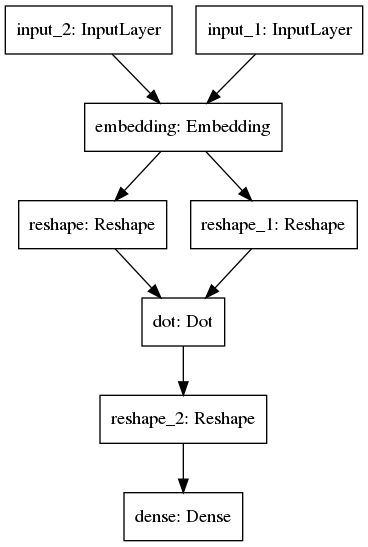

In [72]:
tensorflow.keras.utils.plot_model(model, to_file='model_combined.png')

In [73]:
pd.DataFrame(new_vecs,index=vocab_dic.keys())

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
dyspnea on exertion,-0.170542,0.802204,-0.509942,-0.644076,-0.175769,0.010222,0.379205,0.087659,0.383015,-0.173180,...,0.551936,0.022324,0.286998,0.233145,0.005011,0.406473,0.117938,-0.428651,0.681072,-0.659525
unsteady gait,0.003785,-0.444076,-0.328354,-0.597760,0.132744,-0.014608,0.182841,-0.225347,0.459537,0.057785,...,-0.144608,-0.187705,-0.386660,0.410620,-0.112185,-0.303768,0.303553,-0.218589,0.226655,0.173241
facial paresis,-0.249387,-0.377187,-0.588829,-0.292644,0.394787,0.023409,0.278704,-0.099085,-0.141090,-0.340337,...,-0.100340,0.334574,-0.205486,0.078929,-0.089001,-0.236886,0.349932,-0.218117,-0.167923,-0.526203
hyponatremia,-0.218417,-0.626407,-0.799994,-0.211996,0.178053,-0.009541,0.298644,0.015439,0.104494,0.141370,...,0.016954,0.229623,-0.285187,0.209897,-0.043457,-0.290811,0.190034,0.100379,-0.265913,0.228167
rale,-0.170454,0.553681,-0.585657,0.000492,-0.388516,0.255978,0.358918,0.560700,0.046487,-0.046173,...,-0.415235,0.264682,-0.408476,0.313849,0.202583,-1.224943,0.409343,-0.662782,-0.513728,0.431058
fever,-0.255714,-0.247023,-0.421430,0.529437,-0.214906,0.218524,0.291844,0.035696,-0.475123,-0.039740,...,-0.341020,0.056098,-0.216358,0.111889,0.084933,-0.688406,0.463423,0.659505,-1.144169,-0.582413
distress respiratory,0.125216,0.442779,-0.142872,0.512144,-0.200853,0.250458,0.270642,0.219821,-0.013925,0.025486,...,-0.478713,0.027255,0.358541,0.102902,0.206061,-0.861711,0.173542,0.288860,0.467110,-0.170832
chill,0.067127,0.461928,-0.023712,0.460471,-0.460834,0.252114,0.332715,0.576428,0.078268,0.024261,...,-0.172264,-0.191990,0.209459,0.118448,0.301371,-0.321181,0.597538,0.813985,-0.003680,0.010220
non-productive cough,-0.111937,0.355627,-0.336286,0.122445,-0.375824,0.232026,0.241264,0.028599,0.218924,-0.493786,...,0.246781,-0.232136,0.394453,0.180938,-0.098978,0.109866,0.230971,0.115507,0.649942,0.723344
night sweat,0.077504,0.150672,-0.198249,0.434766,-0.727274,0.197994,0.164213,0.625327,0.064094,-0.294548,...,-0.436884,-0.090023,-0.036866,0.193450,0.107954,-0.451958,0.428386,-0.298130,-0.015849,0.964012


### Comparing with euclidean distance

In [74]:
from sklearn.metrics.pairwise import euclidean_distances

In [75]:
distance = euclidean_distances(new_vecs)

In [76]:
distance

array([[0.       , 2.7708035, 2.7533238, ..., 3.207945 , 3.3680663,
        3.7085683],
       [2.7708035, 0.       , 2.2235508, ..., 2.6433315, 2.5198936,
        2.9397426],
       [2.7533238, 2.2235508, 0.       , ..., 3.042805 , 3.2757142,
        3.699908 ],
       ...,
       [3.207945 , 2.6433315, 3.042805 , ..., 0.       , 2.4105864,
        3.6509376],
       [3.3680663, 2.5198936, 3.2757142, ..., 2.4105864, 0.       ,
        2.3695052],
       [3.7085683, 2.9397426, 3.699908 , ..., 3.6509376, 2.3695052,
        0.       ]], dtype=float32)

In [77]:
distance.shape

(263, 263)

In [78]:
def get_key(val): 
    for key, value in vocab_dic.items(): 
         if val == value: 
            return key 

In [79]:
symp = input('Enter symptom for which similar symptoms are to be found: ')
print ('\nThe similar symptoms are: ')
a=[get_key(idx) for idx in distance[vocab_dic[symp]].argsort()[1:6]+1]
print(a)

Enter symptom for which similar symptoms are to be found: nausea

The similar symptoms are: 
['parkinson disease', 'hallucinations visual', 'hemiplegia', 'mass of body structure', 'vomiting']


### Comparing with Cosine Similarity

In [80]:
def cosine_similarity(x, y):
    
    # Compute the dot product between x and y 
    dot = np.dot(x,y)
    # Compute the L2 norm of x 
    norm_x = np.sqrt(np.sum(x**2))
    # Compute the L2 norm of y
    norm_y = np.sqrt(np.sum(y**2))
    # Compute the cosine similarity
    cosine_similarity = dot/(norm_x * norm_y)
    return cosine_similarity

In [81]:
similarity_score = float(0.6)

In [82]:
# enter the symptom
symp = input('Enter symptom for which similar symptoms are to be found: ')
print ('\nThe similar symptoms are: ')

# loop through the symptoms in the data set and find the symptoms with cosine similarity greater than 'similarity_score'
for i in set(symptom):
    if float(cosine_similarity(new_vecs[vocab_dic[i]], new_vecs[vocab_dic[symp]])) > similarity_score:
        # remove the same symptom from the list of outputs
        if i != symp:
            print (i)

Enter symptom for which similar symptoms are to be found: nausea

The similar symptoms are: 
pain abdominal
abdominal tenderness
headache
vomiting
diarrhea
